 Assignment 6: Unsupervised Learning Using K-Means Clustering on California Housing Data


<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [25]:
import os
print(os.getcwd())

/content


Dataset

In [26]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the California housing dataset
housing_data = fetch_california_housing(as_frame=True)

# Convert to a pandas DataFrame
housing_df = housing_data.frame

# Display the first few rows of the dataset
print(housing_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [27]:
housing_df.to_csv('california_housing.csv', index=False)

In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (you will need to provide the path if this is not predefined)
housing_data = pd.read_csv('california_housing.csv')

# Check the actual column names in the dataframe
print(housing_data.columns)

# Use the correct column names for clustering
# Assuming the column names are 'MedInc', 'Latitude', and 'Longitude'
X = housing_data[['MedInc', 'Latitude', 'Longitude']]
# Adjust these names if they are different in your dataframe

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


K-Means Clustering and Optimize Number of Clusters

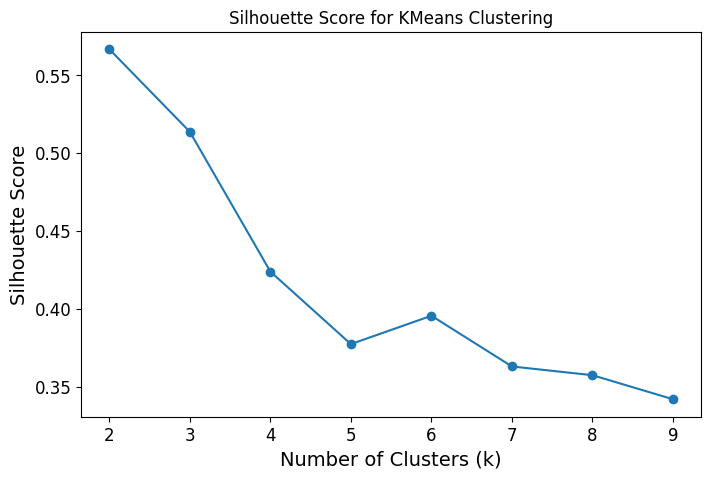

Optimal number of clusters based on silhouette score: 2


In [30]:
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate silhouette score
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores for each k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal k
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters based on silhouette score: {optimal_k}')

Visualize the Clusters


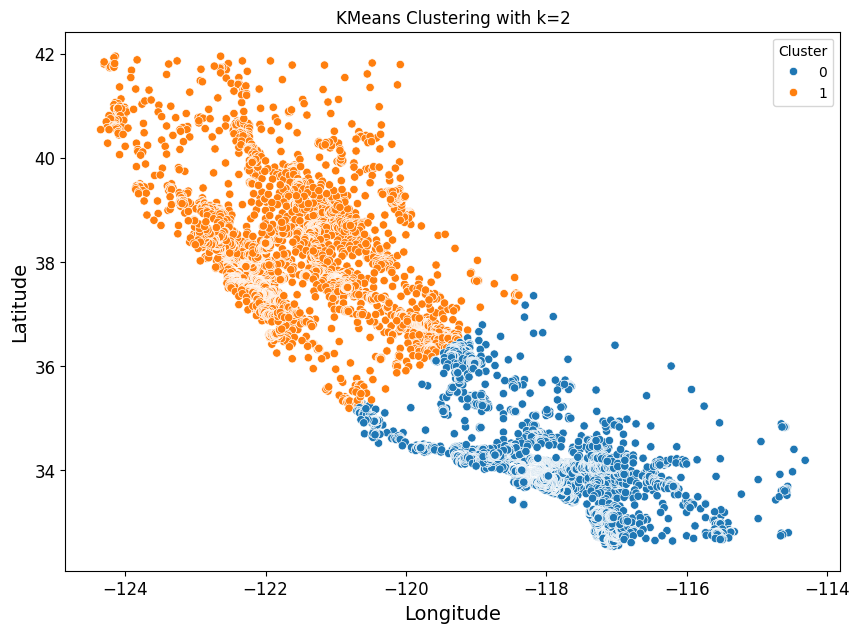

In [32]:
# Apply KMeans with the optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
housing_data['cluster'] = kmeans_optimal.fit_predict(X)

 # Scatter plot of clusters
plt.figure(figsize=(10, 7))
# Change 'longitude' to 'Longitude' and 'latitude' to 'Latitude' to match the column names in housing_data
sns.scatterplot(data=housing_data, x='Longitude', y='Latitude', hue='cluster', palette='tab10', legend='full')
plt.title(f'KMeans Clustering with k={optimal_k}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

Clustering Results

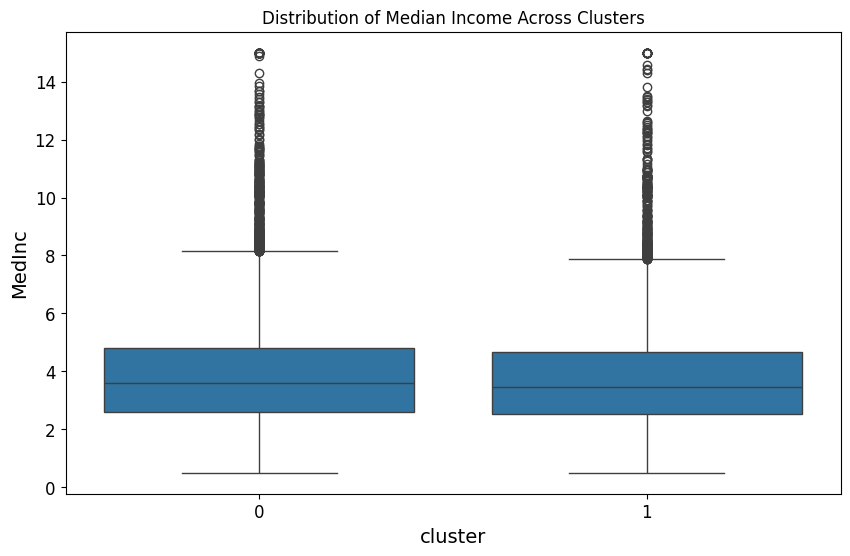

In [35]:
plt.figure(figsize=(10, 6))
# Change 'median_income' to 'MedInc' to match the column name in your dataframe
sns.boxplot(x='cluster', y='MedInc', data=housing_data)
plt.title('Distribution of Median Income Across Clusters')
plt.show()


In [ ]:
Compare with DBSCAN

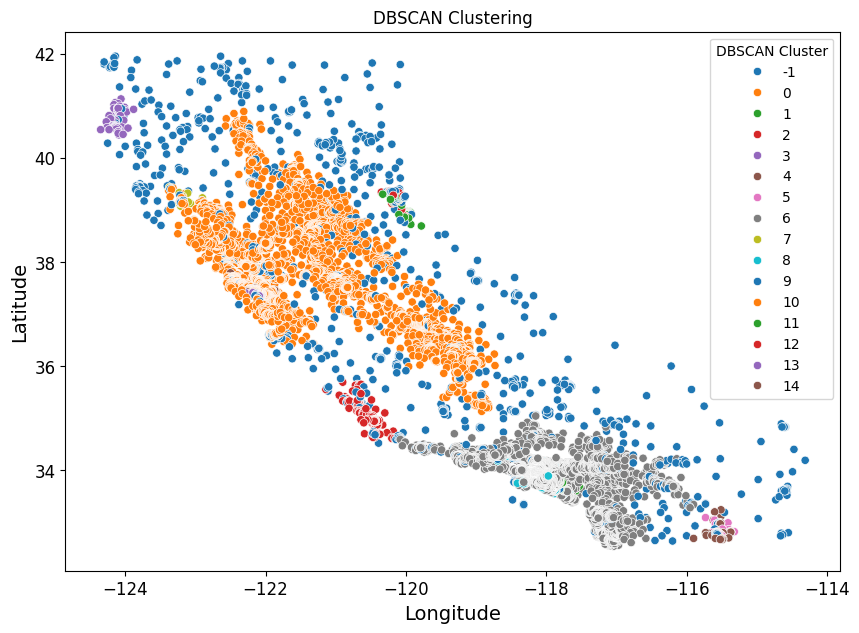

In [37]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
housing_data['dbscan_cluster'] = dbscan.fit_predict(X)
# Visualize DBSCAN results
plt.figure(figsize=(10, 7))
# Change 'longitude' to 'Longitude' and 'latitude' to 'Latitude'
sns.scatterplot(data=housing_data, x='Longitude', y='Latitude', hue='dbscan_cluster', palette='tab10', legend='full')
plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='DBSCAN Cluster')
plt.show()